In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
data = {}
for tp in range(4):
    data[tp+1]  = pd.read_csv(f'datos\counted\d{tp+1}_counted.csv', index_col=0)

In [3]:
data[1].columns

Index(['avisoid', 'empresaid', 'avisofechapublicacion', 'avisovacante',
       'mostrarsueldo', 'avisoexperiencia', 'expiracion', 'dias',
       'avisorepublicacion', 'avisocargo', 'areanombre',
       'actividadempresanombre', 'avisocuerpo', 'disponibilidadnombre',
       'avisoduracioncont', 'avisolugartrabajo', 'gradoescolarnombre',
       'situacionestudios', 'avisorequisitos', 'carreras', 'estado',
       'endpagado_o_gratuito', 'nivelnombre', 'carreras_array',
       'sueldoestimado', '_merge', 'avcu_b1', 'avca_b1', 'avre_b1', 'avcu_b2',
       'avca_b2', 'avre_b2', 'avcu_b3', 'avca_b3', 'avre_b3', 'avcu_b4',
       'avca_b4', 'avre_b4', 'teletrabajo_', 'bucket1', 'bucket2', 'bucket3',
       'bucket4', 'wfh', 'duplicates_avisocuerpo', 'duplicates_avisocargo',
       'similars', 'pseudoindex'],
      dtype='object')

Dates

In [30]:
dates = np.concatenate((data[1]['avisofechapublicacion'].unique(), data[2]['avisofechapublicacion'].unique(), 
                        data[3]['avisofechapublicacion'].unique(), data[4]['avisofechapublicacion'].unique()), axis=0)

Data Frame to sum duplicates

In [33]:
newData = pd.concat([data[1][['avisofechapublicacion', 'duplicates_avisocargo', 'duplicates_avisocuerpo', 'avisoid', 'sueldoestimado', 'bucket1', 'bucket2', 'bucket3', 'bucket4', 'wfh']], 
                     data[2][['avisofechapublicacion', 'duplicates_avisocargo', 'duplicates_avisocuerpo', 'avisoid', 'sueldoestimado', 'bucket1', 'bucket2', 'bucket3', 'bucket4', 'wfh']],
                     data[3][['avisofechapublicacion', 'duplicates_avisocargo', 'duplicates_avisocuerpo', 'avisoid', 'sueldoestimado', 'bucket1', 'bucket2', 'bucket3', 'bucket4', 'wfh']], 
                     data[4][['avisofechapublicacion', 'duplicates_avisocargo', 'duplicates_avisocuerpo', 'avisoid', 'sueldoestimado', 'bucket1', 'bucket2', 'bucket3', 'bucket4', 'wfh']]], 
                     axis=0, ignore_index=True)

In [34]:
newData['avisofechapublicacion'] = pd.to_datetime(newData['avisofechapublicacion'])

In [35]:
newData.set_index('avisofechapublicacion', inplace=True)

In [56]:
trimester_sum_avisocuerpo = newData.resample('3M')['duplicates_avisocuerpo'].sum().reset_index()
trimester_sum_avisocargo = newData.resample('3M')['duplicates_avisocargo'].sum().reset_index()
trimester_count_avisoid = newData.resample('3M')['avisoid'].count().reset_index()
trimester_mean_sueldoestimado = newData.resample('3M')['sueldoestimado'].mean().reset_index()
trimester_sum_bucket1 = newData.resample('3M')['bucket1'].sum().reset_index()
trimester_sum_bucket2 = newData.resample('3M')['bucket2'].sum().reset_index()
trimester_sum_bucket3 = newData.resample('3M')['bucket3'].sum().reset_index()
trimester_sum_bucket4 = newData.resample('3M')['bucket4'].sum().reset_index()
trimester_sum_wfh = newData.resample('3M')['wfh'].sum().reset_index()

In [57]:
trimester = trimester_sum_avisocuerpo
trimester['duplicates_avisocargo'] = trimester_sum_avisocargo['duplicates_avisocargo']
trimester['avisoid'] = trimester_count_avisoid['avisoid']
trimester['sueldoestimado'] = trimester_mean_sueldoestimado['sueldoestimado']
trimester['bucket1'] = trimester_sum_bucket1['bucket1']
trimester['bucket2'] = trimester_sum_bucket2['bucket2']
trimester['bucket3'] = trimester_sum_bucket3['bucket3']
trimester['bucket4'] = trimester_sum_bucket4['bucket4']
trimester['wfh'] = trimester_sum_wfh['wfh']

trimester['avisocuerpo_ratio'] = trimester['duplicates_avisocuerpo']/trimester['avisoid']
trimester['avisocargo_ratio'] = trimester['duplicates_avisocargo']/trimester['avisoid']
trimester['bucket1_ratio'] = trimester['bucket1']/trimester['avisoid']
trimester['bucket2_ratio'] = trimester['bucket2']/trimester['avisoid']
trimester['bucket3_ratio'] = trimester['bucket3']/trimester['avisoid']
trimester['bucket4_ratio'] = trimester['bucket4']/trimester['avisoid']
trimester['wfh_ratio'] = trimester['wfh']/trimester['avisoid']


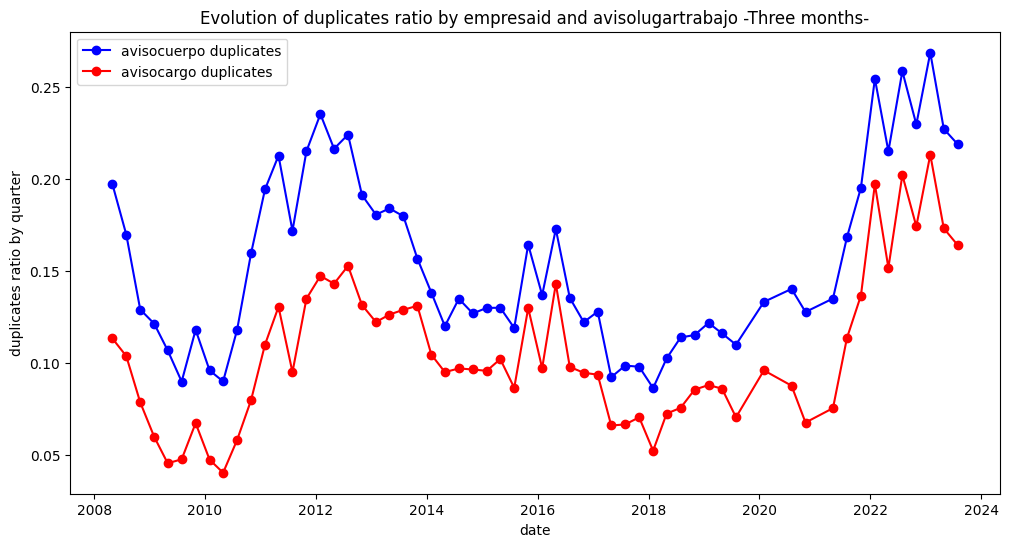

In [66]:
filtered_avisocuerpo = trimester[trimester['avisocuerpo_ratio'] > 0.03]
filtered_avisocargo = trimester[trimester['avisocargo_ratio'] > 0.03]

# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_avisocuerpo['avisofechapublicacion'], filtered_avisocuerpo['avisocuerpo_ratio'], marker='o', linestyle='-', color='b', label='avisocuerpo duplicates')
plt.plot(filtered_avisocargo['avisofechapublicacion'], filtered_avisocargo['avisocargo_ratio'], marker='o', linestyle='-', color='r', label='avisocargo duplicates')
plt.title('Evolution of duplicates ratio by empresaid and avisolugartrabajo -Three months-')
plt.xlabel('date')
plt.ylabel('duplicates ratio by quarter')
plt.grid(False)
plt.legend()
plt.show()



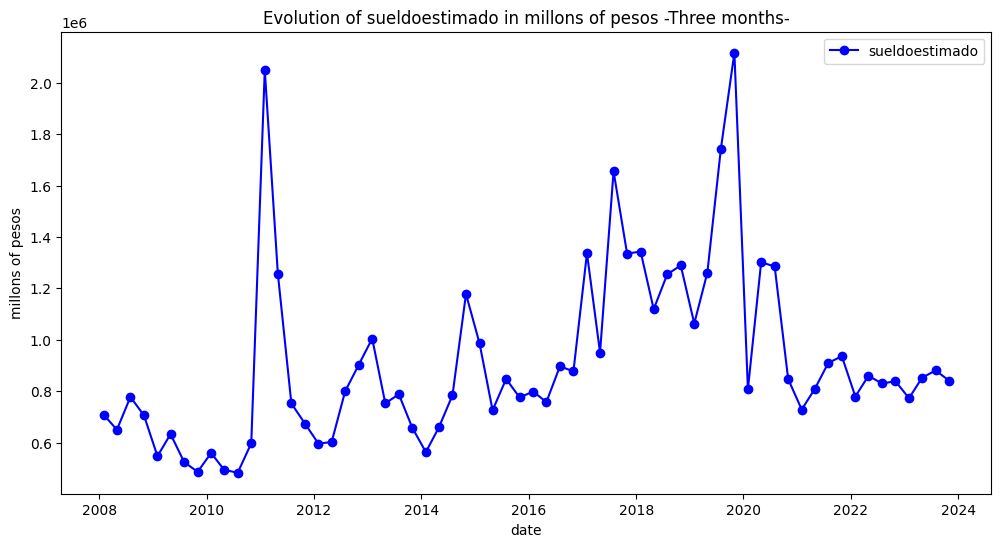

In [55]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(trimester['avisofechapublicacion'], trimester['sueldoestimado'], marker='o', linestyle='-', color='b', label='sueldoestimado')
plt.title('Evolution of sueldoestimado in millons of pesos -Three months-')
plt.xlabel('date')
plt.ylabel('millons of pesos')
plt.grid(False)
plt.legend()
plt.show()

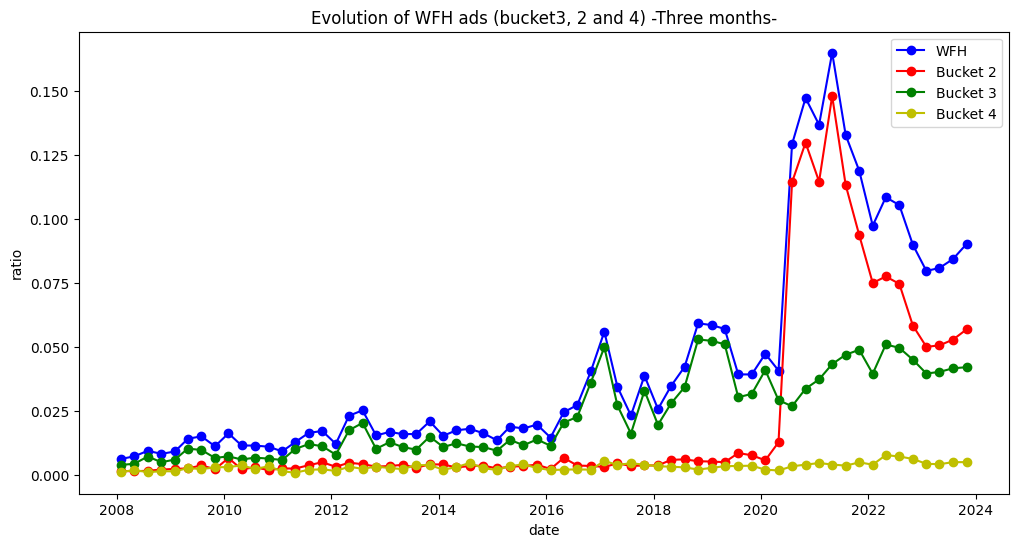

In [62]:
# Create the graph
plt.figure(figsize=(12, 6))
plt.plot(trimester['avisofechapublicacion'], trimester['wfh_ratio'], marker='o', linestyle='-', color='b', label='WFH')
plt.plot(trimester['avisofechapublicacion'], trimester['bucket2_ratio'], marker='o', linestyle='-', color='r', label='Bucket 2')
plt.plot(trimester['avisofechapublicacion'], trimester['bucket3_ratio'], marker='o', linestyle='-', color='g', label='Bucket 3')
plt.plot(trimester['avisofechapublicacion'], trimester['bucket4_ratio'], marker='o', linestyle='-', color='y', label='Bucket 4')
plt.title('Evolution of WFH ads (bucket3, 2 and 4) -Three months-')
plt.xlabel('date')
plt.ylabel('ratio')
plt.grid(False)
plt.legend()
plt.show()